In [1]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#Load data
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

#Normalize pixel values b/w 0 and 1
train_images, test_images = train_images/255.0 , test_images/255.0

169009152/169001437 [==============================] - 4s 0us/step


###CNN MODEL

In [3]:
#Create Convolution base

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
____________________________________________________

In [5]:
#Flatten 

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [7]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 6s 4ms/step - loss: 3.9553 - accuracy: 0.0911 - val_loss: 3.4630 - val_accuracy: 0.1682
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 3.2411 - accuracy: 0.2067 - val_loss: 3.0506 - val_accuracy: 0.2485
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.9192 - accuracy: 0.2681 - val_loss: 2.8746 - val_accuracy: 0.2860
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.6911 - accuracy: 0.3152 - val_loss: 2.7396 - val_accuracy: 0.3119
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5087 - accuracy: 0.3522 - val_loss: 2.6800 - val_accuracy: 0.3310
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.3581 - accuracy: 0.3826 - val_loss: 2.6402 - val_accuracy: 0.3389
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2193 - accuracy: 0.4150 - val_loss: 2.5749 - val_ac

313/313 [==============================] - 1s 2ms/step - loss: 10.3885 - accuracy: 0.3138


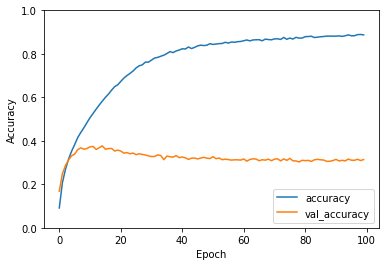

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)

In [9]:
print(test_acc)

0.31380000710487366


### FEED FORWARD NEURAL NETWORK

In [13]:
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 4.5763 - accuracy: 0.0127 - val_loss: 4.5710 - val_accuracy: 0.0139
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 4.5715 - accuracy: 0.0132 - val_loss: 4.5683 - val_accuracy: 0.0139
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 4.5708 - accuracy: 0.0130 - val_loss: 4.5799 - val_accuracy: 0.0140
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 4.5706 - accuracy: 0.0132 - val_loss: 4.5685 - val_accuracy: 0.0140
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 4.5703 - accuracy: 0.0136 - val_loss: 4.5677 - val_accuracy: 0.0141
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 4.5700 - accuracy: 0.0129 - val_loss: 4.5677 - val_accuracy: 0.0140
Epoch 7/100
1563/1563 [==============================] - 6s 4ms/step - loss: 4.5700 - accuracy: 0.0139 - val_loss: 4.5683 - val_ac

313/313 [==============================] - 1s 2ms/step - loss: 4.5724 - accuracy: 0.0140


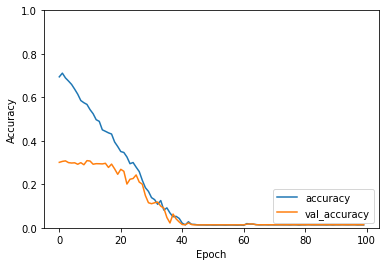

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)